# Notebook for data treatment and visualization

In [ ]:
!pip install pandas
!pip install matplotlib

In [13]:
import json
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
SEQUENCE_ONE = "hypertune.json"

In [ ]:
# Open the file and load JSON data
with open(SEQUENCE_ONE, 'r') as file:
    data = json.load(file)

# Convert to Pandas DataFrame
df = pd.DataFrame([
    {
        "File": entry["parameters"]["input_file"],
        "k": entry["parameters"]["k"],
        "a": entry["parameters"]["a"],
        "Mean Time (s)": entry["mean"],
        "Std Dev (s)": entry["stddev"],
        "Median Time (s)": entry["median"],
        "Min Time (s)": entry["min"],
        "Max Time (s)": entry["max"]
    }
    for entry in data["results"]
])

print(df.head())


    k     a  Mean Time (s)  Std Dev (s)  Median Time (s)  Min Time (s)  \
0   3  0.01       0.009949     0.004197         0.008898      0.006410   
1   5  0.01       0.015171     0.006056         0.015320      0.007700   
2  10  0.01       0.021230     0.005707         0.017970      0.015990   
3  15  0.01       0.025644     0.007122         0.027046      0.017126   
4  20  0.01       0.030027     0.005124         0.030817      0.017409   

   Max Time (s)  
0      0.018981  
1      0.025207  
2      0.029443  
3      0.035853  
4      0.035708  


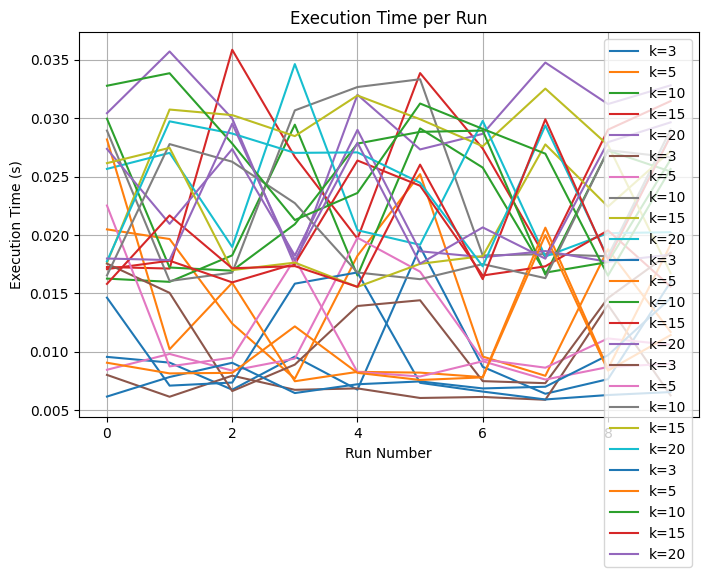

In [16]:

# Plot execution times for different k values
plt.figure(figsize=(8, 5))
for entry in data["results"]:
    k = entry["parameters"]["k"]
    plt.plot(entry["times"], label=f'k={k}')

plt.xlabel("Run Number")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time per Run")
plt.legend()
plt.grid(True)
plt.show()

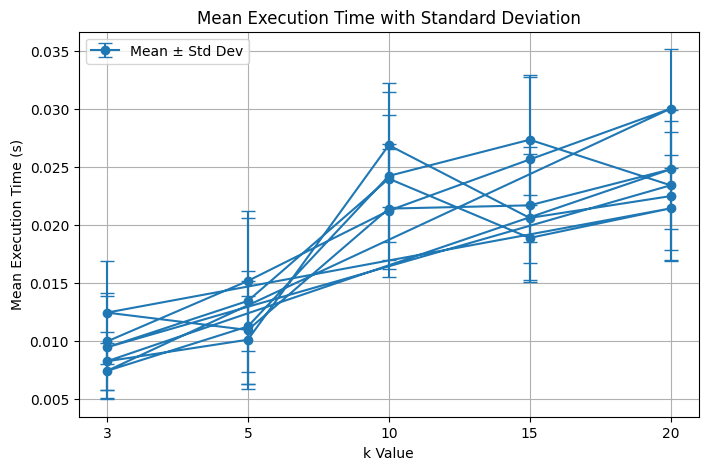

In [17]:
# Plot mean execution time with standard deviation
plt.figure(figsize=(8, 5))
plt.errorbar(df["k"], df["Mean Time (s)"], yerr=df["Std Dev (s)"], fmt='o-', capsize=5, label="Mean ± Std Dev")
plt.xlabel("k Value")
plt.ylabel("Mean Execution Time (s)")
plt.title("Mean Execution Time with Standard Deviation")
plt.legend()
plt.grid(True)
plt.show()